In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# basic plot variales
pd.options.display.max_columns = 100
blue = '#3298D0'
plot_size = (14, 10)

## Load data

In [3]:
#load data
DATA_FILE = "Data/nba-players-stats/Seasons_Stats.csv"

def load_NBA_data(url):
    return pd.read_csv(url)

nba_data = load_NBA_data(DATA_FILE)

## Data cleaning
- Drop columns don't needed
- Delete NA and inf values
- Correct dtypes values

In [4]:
#Dataset info
print(nba_data.columns)
#24,691 entries

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [5]:
# Dates formatting
nba_data['Year'] =  pd.to_datetime(nba_data['Year'])
nba_data['year'] = nba_data['Year'].astype('int64')

In [6]:
nba_data = nba_data.fillna(0)

In [7]:
# New data types
nba_data['Pos'] = nba_data['Pos'].astype('category')
nba_data['Pos'] = nba_data['Pos'].astype('category')

#stats to int32
list_stats_int = ['ORB', 'DRB', 'TRB', 'AST', 
                  'STL', 'BLK', 'TOV', 'PF', 
                  'PTS', '3P', '3P%', 'G', 'Age', 
                  'PTS', 'MP', '3PA']
for ls in list_stats_int:
    nba_data[ls] = nba_data[ls].astype('int32')

In [8]:
# Delete colum ns
nba_data = nba_data.drop(columns = ['Year', 'blanl', 'blank2', 'Unnamed: 0'])

In [9]:
nba_data.sample(5)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
1440,Kenny Sears,PF,25,NYK,71,0.0,2498,22.6,0.590,0.000,0.587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.9,1.5,13.3,0.256,0.0,0.0,0.0,0.0,491.0,1002.0,0.490,0,0,0,491.0,1002.0,0.490,0.490,506.0,588.0,0.861,0,0,658,136,0,0,0,237,1488,1959
14049,Doug Christie,SG,28,TOR,50,50.0,1768,16.9,0.501,0.248,0.378,3.8,9.8,6.8,19.4,3.5,1.1,13.6,22.5,2.5,1.7,4.2,0.113,2.0,0.0,1.9,1.8,252.0,650.0,0.388,49,161,0,203.0,489.0,0.415,0.425,207.0,246.0,0.841,59,148,207,187,113,26,119,111,760,1999
5534,Dan Issel*,C,30,DEN,81,0.0,2742,18.3,0.568,0.000,0.407,9.2,18.8,14.0,13.3,1.0,0.9,12.3,19.5,6.7,3.1,9.8,0.172,2.4,0.4,2.8,3.3,532.0,1030.0,0.517,0,0,0,532.0,1030.0,0.517,0.517,316.0,419.0,0.754,240,498,738,255,61,46,171,233,1380,1979
10029,Ken Bannister,PF,30,LAC,47,3.0,339,7.8,0.506,0.012,0.802,10.6,20.0,15.3,3.6,0.7,1.2,18.6,16.1,-0.2,0.4,0.2,0.028,-5.0,-1.2,-6.3,-0.4,43.0,81.0,0.531,0,1,0,43.0,80.0,0.538,0.531,25.0,65.0,0.385,34,62,96,9,5,7,25,73,111,1991
23587,Chase Budinger,SF,27,TOT,66,2.0,929,10.7,0.514,0.360,0.234,5.0,12.6,8.8,10.2,1.7,0.9,14.3,14.5,0.4,1.0,1.4,0.073,-2.0,0.3,-1.7,0.1,104.0,239.0,0.435,24,86,0,80.0,153.0,0.523,0.485,39.0,56.0,0.696,43,107,150,64,32,10,44,62,271,2016


## Filter data from 1980

In [10]:
#select only data since 1980
filtered_data = nba_data[nba_data.year > 1979 ]
filtered_data.sort_values(by='year', ascending = True)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
5727,Kareem Abdul-Jabbar*,C,32,LAL,82,0.0,3143,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0,1,0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190,696,886,371,81,280,297,216,2034,1980
5970,Eric Money,SG,24,DET,55,0.0,1467,11.7,0.539,0.000,0.204,2.0,5.0,3.5,21.8,1.6,0.4,20.5,18.3,0.6,0.2,0.8,0.026,-1.6,-2.7,-4.3,-0.9,259.0,510.0,0.508,0,0,0,259.0,510.0,0.508,0.508,81.0,104.0,0.779,28,69,97,238,53,10,143,135,599,1980
5969,Eric Money,PG,24,PHI,6,0.0,82,4.4,0.407,0.000,0.056,4.1,4.9,4.5,27.2,0.0,0.7,24.5,23.8,-0.2,0.1,-0.2,-0.094,-6.8,-3.9,-10.7,-0.2,14.0,36.0,0.389,0,0,0,14.0,36.0,0.389,0.389,2.0,2.0,1.000,3,4,7,16,0,1,12,11,30,1980
5968,Eric Money,SG-PG,24,TOT,61,0.0,1549,11.4,0.531,0.000,0.194,2.1,5.0,3.5,22.1,1.5,0.4,20.7,18.6,0.4,0.3,0.6,0.020,-1.8,-2.8,-4.7,-1.0,273.0,546.0,0.500,0,0,0,273.0,546.0,0.500,0.500,83.0,106.0,0.783,31,73,104,254,53,11,155,146,629,1980
5967,Sidney Moncrief,SG,22,MIL,77,0.0,1557,15.9,0.564,0.002,0.647,11.1,12.5,11.8,10.7,2.2,0.6,16.8,17.8,2.8,2.0,4.9,0.150,0.9,0.7,1.7,1.4,211.0,451.0,0.468,0,1,0,211.0,450.0,0.469,0.468,232.0,292.0,0.795,154,184,338,133,72,16,117,106,654,1980
5966,Paul Mokeski,C,23,HOU,12,0.0,113,4.4,0.392,0.000,0.273,13.3,15.1,14.2,2.2,0.4,3.0,21.3,16.4,-0.2,0.1,-0.1,-0.041,-6.1,-1.6,-7.7,-0.2,11.0,33.0,0.333,0,0,0,11.0,33.0,0.333,0.333,7.0,9.0,0.778,14,15,29,2,1,6,10,24,29,1980
5965,Steve Mix,SF,32,PHI,81,0.0,1543,19.5,0.577,0.014,0.354,8.3,11.5,10.0,14.8,2.0,0.3,14.0,24.5,3.4,2.1,5.5,0.172,1.9,-0.8,1.1,1.2,363.0,703.0,0.516,4,10,0,359.0,693.0,0.518,0.519,207.0,249.0,0.831,114,176,290,149,67,9,132,114,937,1980
5964,Mike Mitchell,SF,24,CLE,82,0.0,2802,19.1,0.557,0.004,0.231,7.4,15.2,11.1,4.9,1.1,1.5,9.5,24.7,5.9,2.4,8.3,0.142,1.7,-1.4,0.3,1.6,775.0,1482.0,0.523,0,6,0,775.0,1476.0,0.525,0.523,270.0,343.0,0.787,206,385,591,93,70,77,172,259,1820,1980
5963,Dave Meyers,PF,26,MIL,79,0.0,2204,13.3,0.509,0.006,0.296,7.1,14.7,11.0,13.6,1.5,1.0,16.2,20.2,1.0,2.8,3.9,0.084,-0.8,0.7,-0.1,1.0,399.0,830.0,0.481,1,5,0,398.0,825.0,0.482,0.481,156.0,246.0,0.634,140,308,448,225,72,40,182,218,955,1980
5971,Earl Monroe*,SG,35,NYK,51,0.0,633,15.3,0.497,0.000,0.182,2.7,3.5,3.1,15.0,1.5,0.3,6.9,24.8,1.0,0.1,1.1,0.081,-0.8,-4.7,-5.5,-0.6,161.0,352.0,0.457,0,0,0,161.0,352.0,0.457,0.457,56.0,64.0,0.875,16,20,36,67,21,3,28,46,378,1980


# ML model

In [11]:
from sklearn.cluster import KMeans

## Preparing dataset

In [12]:
df = filtered_data.groupby(['Player']).agg({'3PA':'sum', 
                                            '3P':'sum', 
                                            'year':'count', 
                                            'PTS':'sum'})

In [13]:
# Clean columns

df['3PA_per_season'] = round(df['3PA'] / df['year'], 2)
df['3P%_career'] = (round(df['3PA'] / df['3P'], 2)) * 10

df = df.sort_values(by='3P', ascending=False)

# Check dataset
print(df.count())
df.head(5)

3PA               2835
3P                2835
year              2835
PTS               2835
3PA_per_season    2835
3P%_career        2457
dtype: int64


,3PA,3P,year,PTS,3PA_per_season,3P%_career
Player,,,,,,
Ray Allen,7962,3174,20,26218,398.10,25.1
Reggie Miller*,6486,2560,18,25279,360.33,25.3
Kyle Korver,5409,2322,18,11713,300.50,23.3
Vince Carter,6119,2292,23,27463,266.04,26.7
Tim Hardaway,6349,2251,21,20339,302.33,28.2


In [33]:
# Remove players with less than 3 years of experience
rookies = df[df['year'] < 3]
df = df[df['year'] > 3] 

(0, 7)


In [17]:
# Replace inf values with nan
df['3P%_career'] = df['3P%_career'].replace([np.inf, -np.inf], np.nan)

# Drop Na values
df = df.dropna()

/Users/cmserna/miniconda3/envs/clinical-trials/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
print(df.count())
df.sample(20)

3PA               1431
3P                1431
year              1431
PTS               1431
3PA_per_season    1431
3P%_career        1431
dtype: int64


,3PA,3P,year,PTS,3PA_per_season,3P%_career
Player,,,,,,
Dell Curry,3098,1245,16,12670,193.62,24.9
Sidney Moncrief,387,110,11,11931,35.18,35.2
Otis Birdsong,179,49,10,9610,17.90,36.5
Damien Wilkins,609,201,9,3571,67.67,30.3
Russell Westbrook,2258,706,9,15156,250.89,32.0
Sasha Pavlovic,921,320,13,2863,70.85,28.8
Greg Kite,7,1,18,2099,0.39,70.0
Brad Daugherty,14,2,8,10389,1.75,70.0
Bobby Jackson,2173,770,14,7897,155.21,28.2


# Kmeans classification

In [20]:
# Create clusters
n = 6
clusters = KMeans(n_clusters=n)

# Using only 3P made to classify
X = df[['3PA', '3P', 'year', '3PA_per_season', '3P%_career']]

# Fit clusterer
clusters.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
# Create new group with values
df['group'] = clusters.predict(X)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1431 entries, Ray Allen to Rasho Nesterovic
Data columns (total 7 columns):
3PA               1431 non-null int32
3P                1431 non-null int32
year              1431 non-null int64
PTS               1431 non-null int32
3PA_per_season    1431 non-null float64
3P%_career        1431 non-null float64
group             1431 non-null int32
dtypes: float64(2), int32(4), int64(1)
memory usage: 67.1+ KB


In [23]:
df.group = df.group.astype('category', ordered = False, categories = range(0, n))

/Users/cmserna/miniconda3/envs/clinical-trials/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [24]:
df.group.unique()

[1, 4, 5, 2, 0, 3]
Categories (6, int64): [1, 4, 5, 2, 0, 3]

In [25]:
group_0 = df[(df['group'] == 0)]
group_1 = df[(df['group'] == 1)]
group_2 = df[(df['group'] == 2)]
group_3 = df[(df['group'] == 3)]
group_4 = df[(df['group'] == 4)]
group_5 = df[(df['group'] == 5)]

In [26]:
h = 25

print('\n------------')
print('Group 0: {} players'.format(group_0.describe()))
print(group_0.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 1: {} players'.format(group_1.describe()))
print(group_1.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 2: {} players'.format(group_2.describe()))
print(group_2.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 3: {} players'.format(group_3.describe()))
print(group_3.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 4: {} players'.format(group_4.describe()))
print(group_4.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 5: {} players'.format(group_5.describe()))
print(group_5.sort_values(by='3P', ascending=False).head(h))


------------
Group 0:                3PA          3P        year           PTS  3PA_per_season  \
count   255.000000  255.000000  255.000000    255.000000      255.000000   
mean    635.643137  209.729412   10.231373   5236.517647       73.828118   
std     183.224643   70.495165    4.391002   4711.829832       36.927335   
min     363.000000   80.000000    4.000000    655.000000       17.740000   
25%     467.500000  147.000000    7.000000   1996.000000       45.275000   
50%     629.000000  204.000000   10.000000   3196.000000       67.380000   
75%     774.000000  266.500000   13.000000   7018.500000       96.375000   
max    1005.000000  378.000000   25.000000  26394.000000      221.250000   

       3P%_career  
count  255.000000  
mean    31.117255  
std      4.525094  
min     23.100000  
25%     28.150000  
50%     30.300000  
75%     33.100000  
max     58.000000   players
                   3PA   3P  year   PTS  3PA_per_season  3P%_career group
Player                        

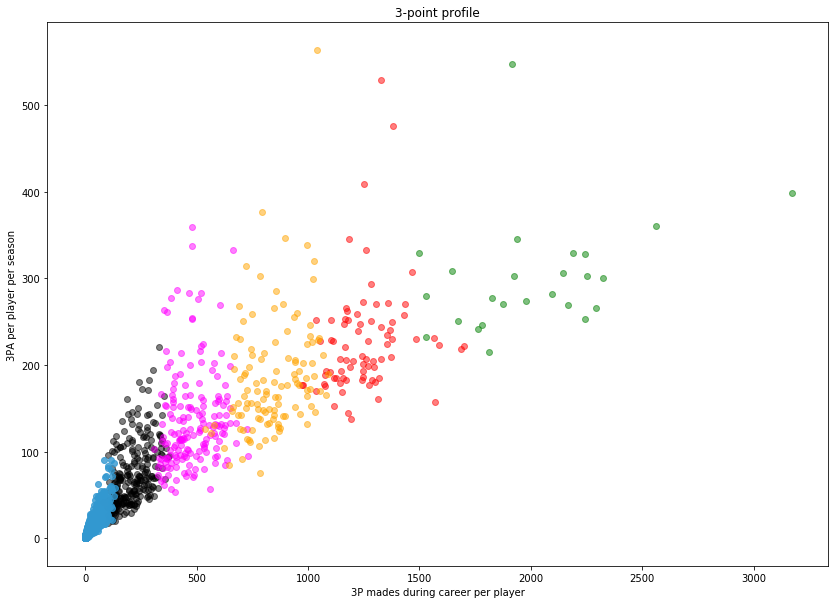

In [27]:
'''
Variables in the model:
3PA', '3P', 'year', '3PA_per_season', '3P%_career'
'''

plt.figure(figsize=plot_size)

a = '3P'
b = '3PA_per_season'
h = 0.5
h_top = 0.8

plt.scatter(group_0[a], group_0[b], c='black', alpha=h)
plt.scatter(group_1[a], group_1[b], c='green', alpha=h)
plt.scatter(group_2[a], group_2[b], c='magenta', alpha=h)
plt.scatter(group_3[a], group_3[b], c= blue, alpha=h_top)
plt.scatter(group_4[a], group_4[b], c='red', alpha=h)
plt.scatter(group_5[a], group_5[b], c='orange', alpha=h)

plt.title('3-point profile')
plt.xlabel('3P mades during career per player')
plt.ylabel('3PA per player per season')

plt.xscale('linear')
plt.yscale('linear')

plt.show()

In [29]:
# Exporting dataset 
df.to_csv(path_or_buf='data/RM-index.csv', sep=',')
rookies.to_csv(path_or_buf='data/rookies.csv', sep=',')